In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\Multiple linear regression\Toyoto_Corrola.csv')

In [3]:
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
#Print the duplicated rows
data[data.duplicated()]


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight


In [6]:
data.describe()

,Id,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.0,1436.000000,1436.00000
mean,721.555014,10730.824513,55.947075,68533.259749,101.502089,4.033426,4.0,5.026462,1072.45961
std,416.476890,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.0,0.188510,52.64112
min,1.000000,4350.000000,1.000000,1.000000,69.000000,2.000000,4.0,3.000000,1000.00000
25%,361.750000,8450.000000,44.000000,43000.000000,90.000000,3.000000,4.0,5.000000,1040.00000
50%,721.500000,9900.000000,61.000000,63389.500000,110.000000,4.000000,4.0,5.000000,1070.00000
75%,1081.250000,11950.000000,70.000000,87020.750000,110.000000,5.000000,4.0,5.000000,1085.00000
max,1442.000000,32500.000000,80.000000,243000.000000,192.000000,5.000000,4.0,6.000000,1615.00000


In [7]:
# All Tyoto corolla cars have cylinders. Cylindar data have no significance in predicting price 

In [8]:
data_cleaned=data.drop('Cylinders',axis=1)

In [9]:
data_cleaned.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,5,1170


In [10]:
data_cleaned2=data_cleaned.iloc[:,2:]
data_cleaned2.head()

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [11]:
data_cleaned3=data_cleaned2.rename({'Age_08_04':'Age'}, axis=1)
data_cleaned3.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170


In [12]:
data_cleaned3.corr()

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


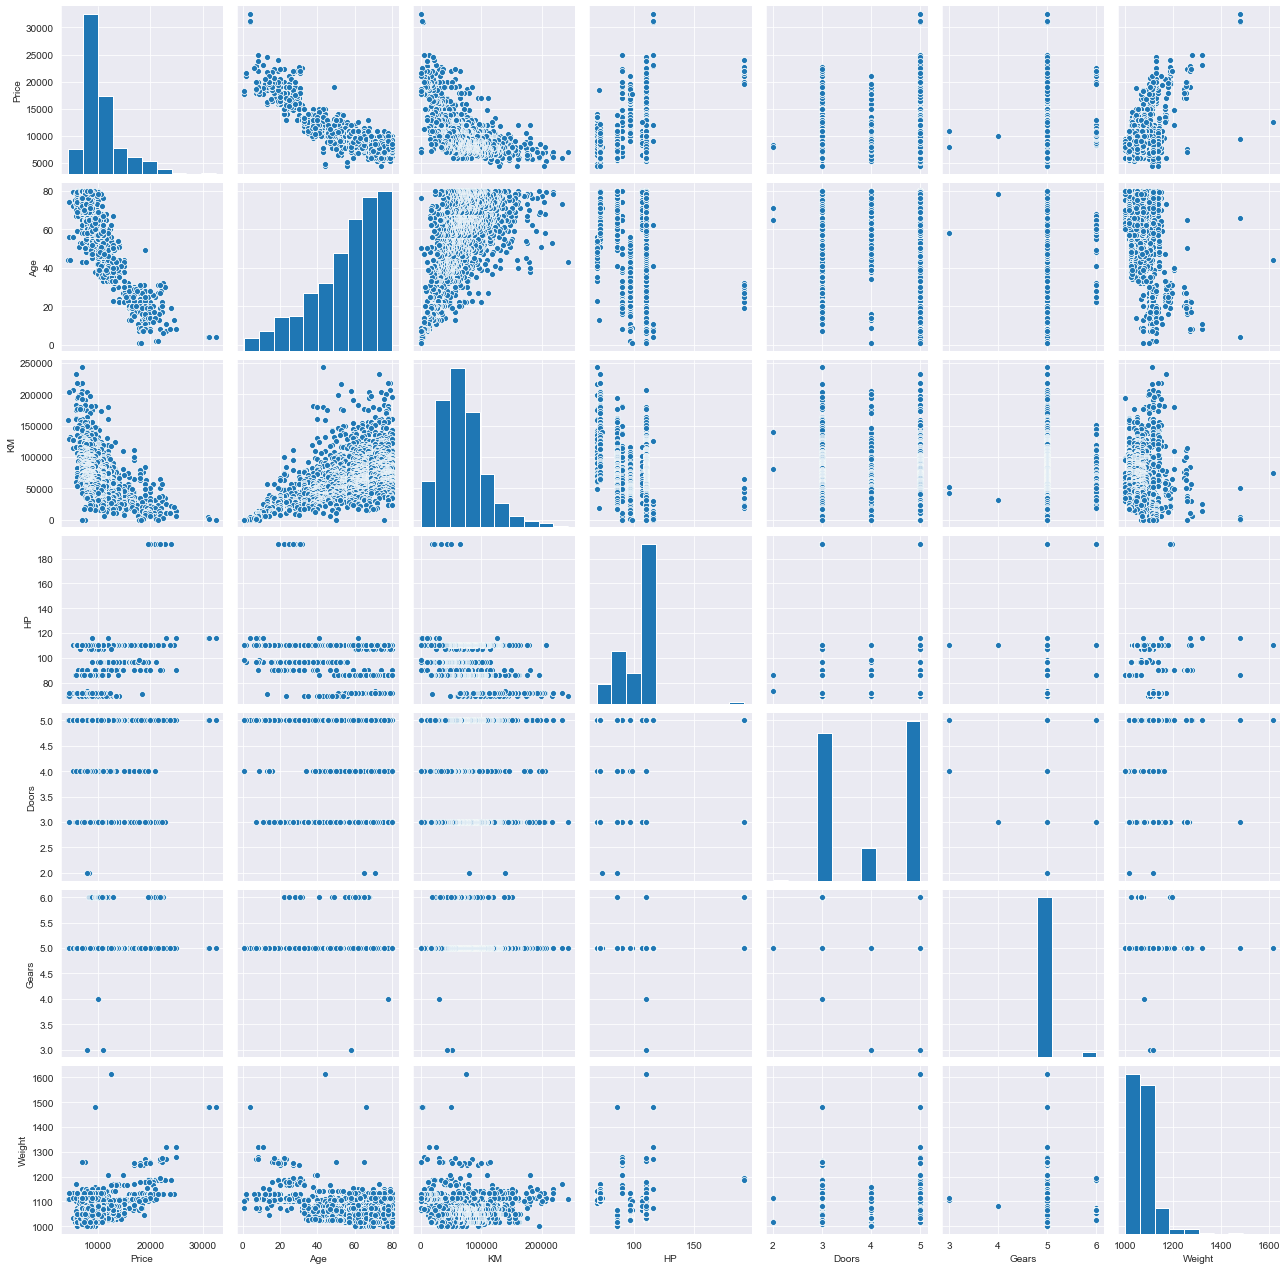

In [13]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.set_style(style='darkgrid')
sns.pairplot(data_cleaned3)

In [14]:
data_cleaned3.isna().sum()

Price     0
Age       0
KM        0
HP        0
Doors     0
Gears     0
Weight    0
dtype: int64

In [15]:
model=smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=data_cleaned3).fit()

In [16]:
model.params

Intercept   -6984.373566
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [17]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [18]:
print(model.rsquared,'\n',model.rsquared_adj)

0.8628024511073658 
 0.8622263942190832


In [19]:
#Doors p value is less than 0.05, then we Accept Null Hypothesis , since there is no slope we will drop Doors.

In [20]:
data_cleaned4=data_cleaned3.drop('Doors',axis=1)

In [21]:
data_cleaned4.head()

,Price,Age,KM,HP,Gears,Weight
0,13500,23,46986,90,5,1165
1,13750,23,72937,90,5,1165
2,13950,24,41711,90,5,1165
3,14950,26,48000,90,5,1165
4,13750,30,38500,90,5,1170


In [22]:
model1=smf.ols('Price~Age+KM+HP+Gears+Weight',data=data_cleaned4).fit()

In [23]:
model.params

Intercept   -6984.373566
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [24]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept    -5.355584
Age         -46.745013
KM          -16.550661
HP           10.881794
Gears         3.262043
Weight       23.192000
dtype: float64 
 Intercept     9.925271e-08
Age          2.772608e-290
KM            1.985300e-56
HP            1.496107e-26
Gears         1.132207e-03
Weight       2.904479e-101
dtype: float64


In [25]:
print(model1.rsquared,'\n',model1.rsquared_adj)

0.8627968258548101 
 0.86231709447668


In [26]:
 vif1=smf.ols('Age~KM+HP+Gears+Weight',data=data_cleaned4).fit().rsquared
vif_age=1/(1-vif1)
vif_age

1.8745318721129602

In [27]:
 vif2=smf.ols('KM~Age+HP+Gears+Weight',data=data_cleaned4).fit().rsquared
vif_KM=1/(1-vif2)
vif_KM

1.6269219981110372

In [28]:
 vif3=smf.ols('HP~Age+KM+Gears+Weight',data=data_cleaned4).fit().rsquared
vif_HP=1/(1-vif3)
vif_HP

1.2012125083861553

In [29]:
 vif4=smf.ols('Gears~Age+KM+HP+Weight',data=data_cleaned4).fit().rsquared
vif_Gears=1/(1-vif4)
vif_Gears

1.0553178269616392

In [30]:
 vif5=smf.ols('Weight~Age+KM+HP+Gears',data=data_cleaned4).fit().rsquared
vif_Weight=1/(1-vif5)
vif_Weight

1.4056981766972971

In [31]:
#storing VIF values in data frame
d1={'Variables':['age','Weight','KM','HP','Gears'],'VIF':[vif_age,vif_Weight,vif_KM,vif_HP,vif_Gears]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,age,1.874532
1,Weight,1.405698
2,KM,1.626922
3,HP,1.201213
4,Gears,1.055318


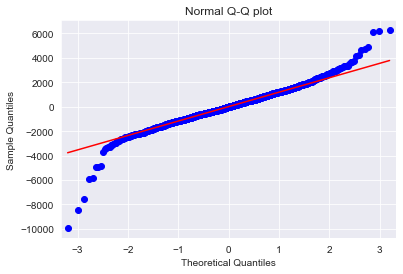

In [32]:
# residual Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot')
plt.show()

In [33]:
list(np.where(model1.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   48,   49,   51,   52,
          53,   56,   58,   59,   61,   62,   63,   64,   65,   66,   68,
          69,   70,   72,   74,   75,   76,   77,   78,   80,   81,   83,
          84,   85,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  127,
         128,  134,  136,  138,  139,  141,  142,  143,  144,  146,  147,
         148,  149,  150,  151,  152,  153,  154,  156,  157,  158,  159,
         160,  161,  162,  163,  165,  166,  167,  168,  169,  170,  171,
         172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
         183,  190,  194,  196,  197,  201,  204,  205,  210,  211,  216,
         223,  230,  232,  233,  237, 

In [34]:
model1.resid

0      -3064.543464
1      -2295.618887
2      -2597.780391
3      -1227.536164
4      -2221.313393
           ...     
1431   -1258.913123
1432    2607.517313
1433     100.600932
1434   -1273.642376
1435   -3694.388795
Length: 1436, dtype: float64

In [35]:
def get_standard(vals):
    return(vals-vals.mean())/vals.std()
    

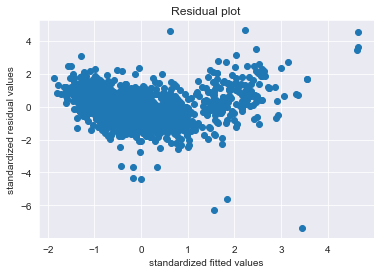

In [36]:
plt.scatter(get_standard(model1.fittedvalues),get_standard(model1.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

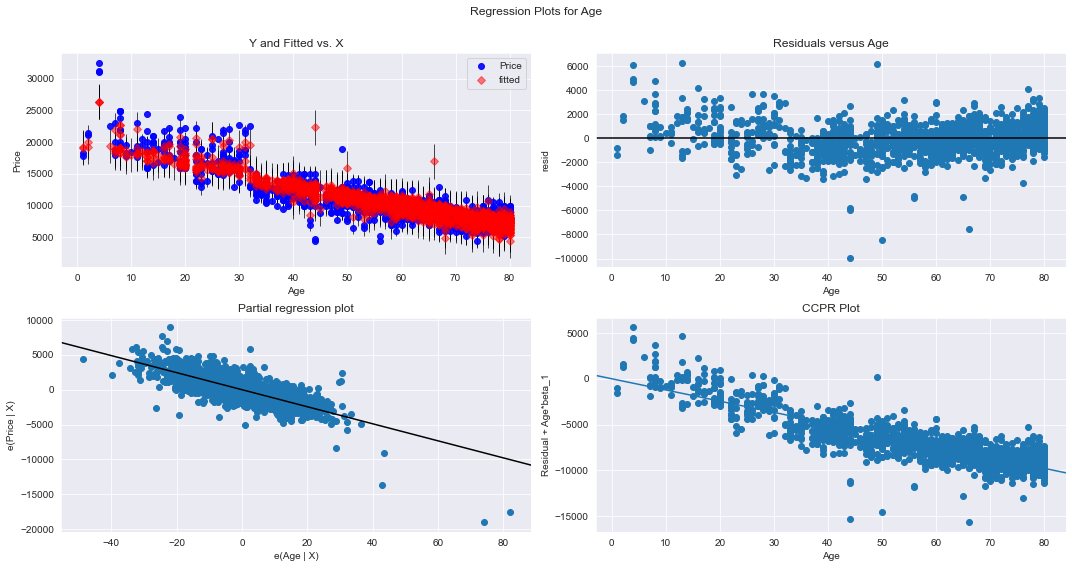

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Age",fig=fig)
plt.show()
#'Weight~Age_08_04+KM+HP+Doors+Gears'

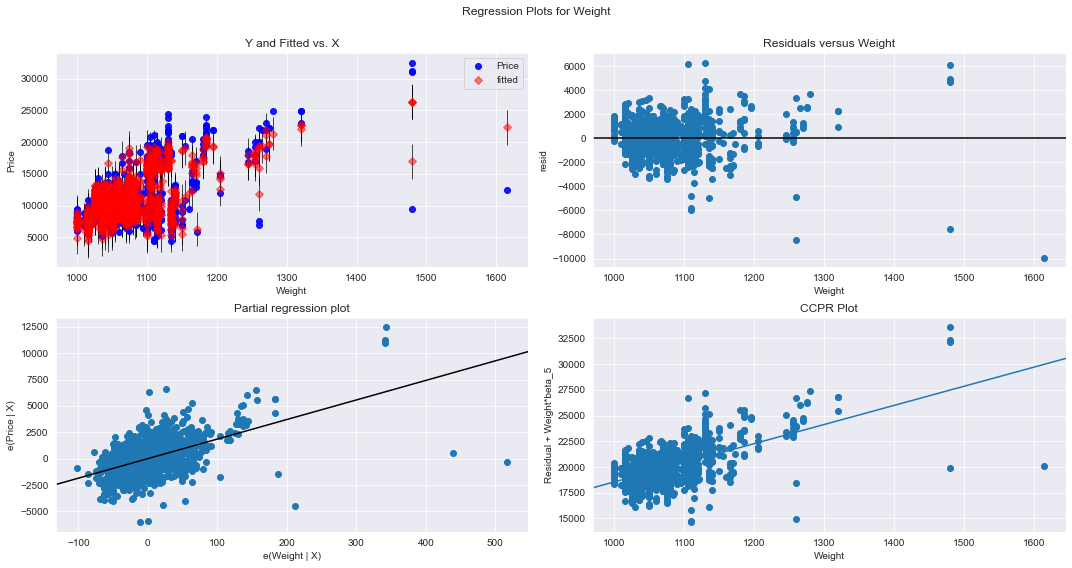

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Weight",fig=fig)
plt.show()
#'Weight~Age_08_04+KM+HP+Doors+Gears'

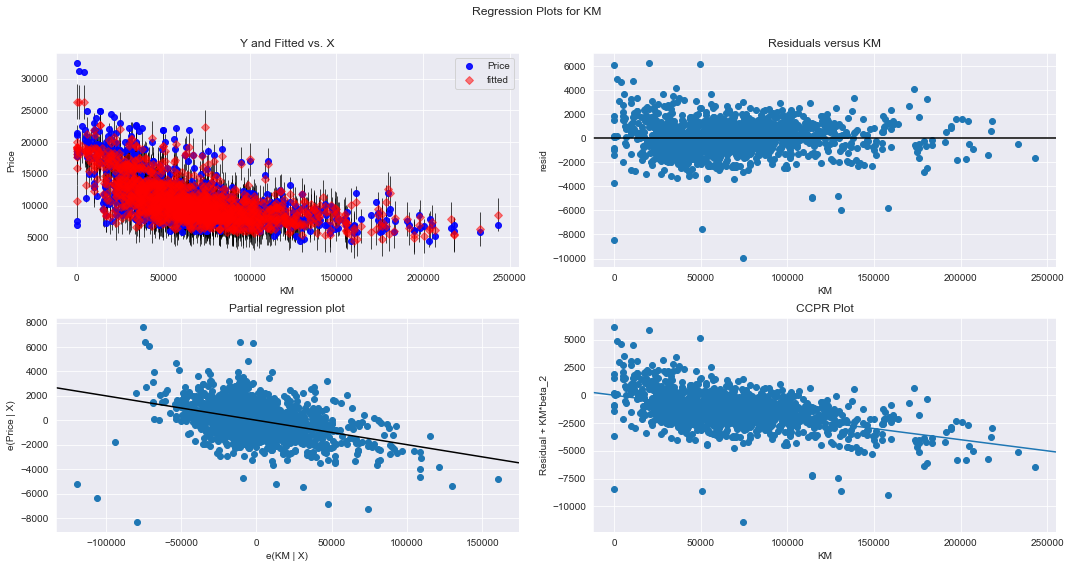

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"KM",fig=fig)
plt.show()
#+KM+HP+Doors+Gears'

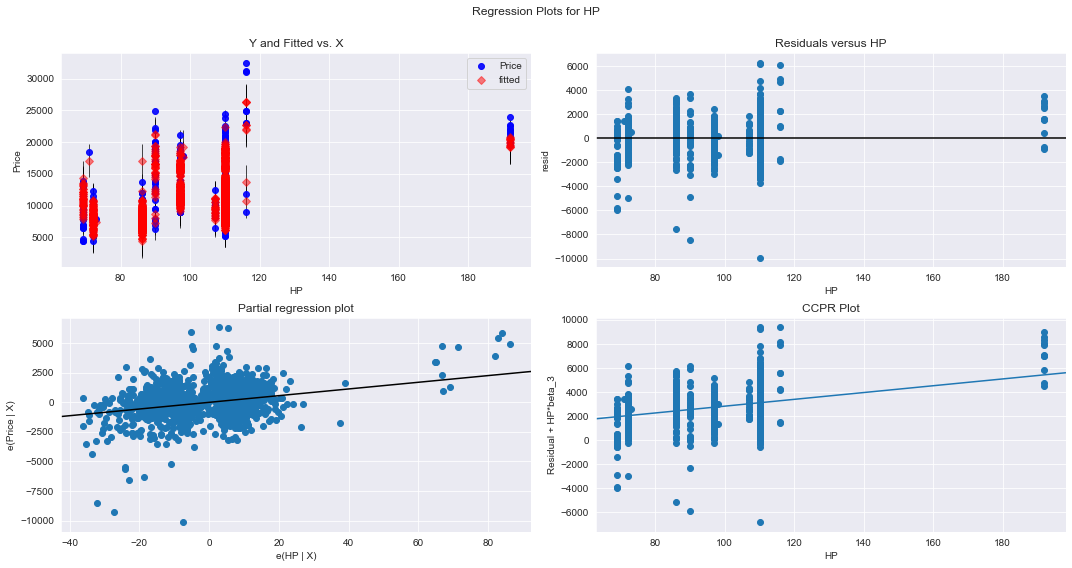

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"HP",fig=fig)
plt.show()
#HP+Doors+Gears'

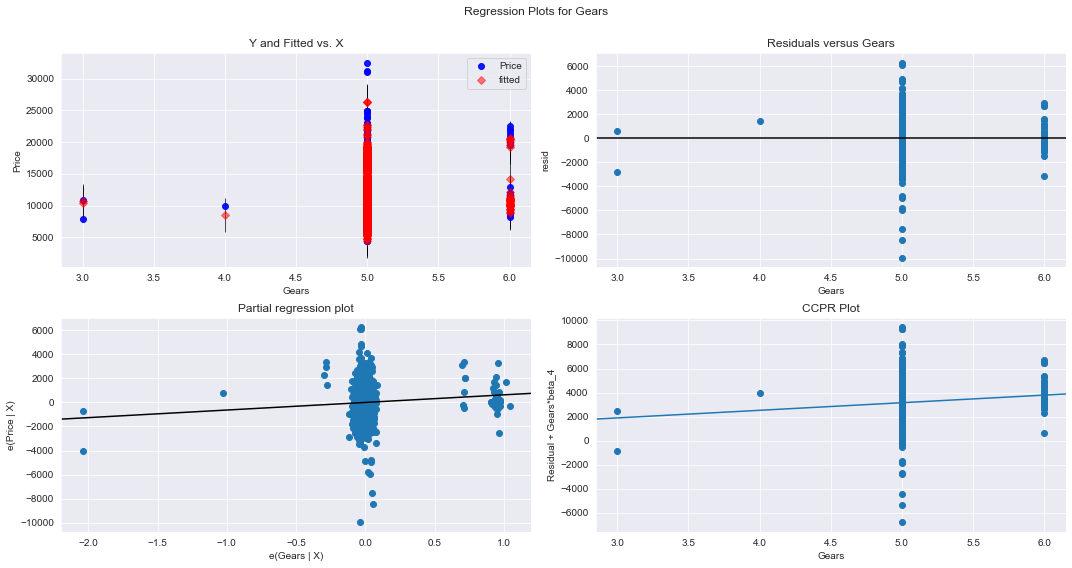

In [41]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model1,"Gears",fig=fig)
plt.show()
#Gears'

In [42]:
#Model deletion diagnostics
#Detecting influencer/outliers
#Cooks distance
model1_influence=model1.get_influence()
(c, _)=model1_influence.cooks_distance

In [43]:
c

array([3.93434589e-03, 2.31040537e-03, 2.83768084e-03, ...,
       5.64792220e-06, 8.84563614e-04, 1.35781672e-02])

<ipython-input-44-dcfd080f8098>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data_cleaned4)),np.round(c,3))


Text(0, 0.5, 'Cooks distance')

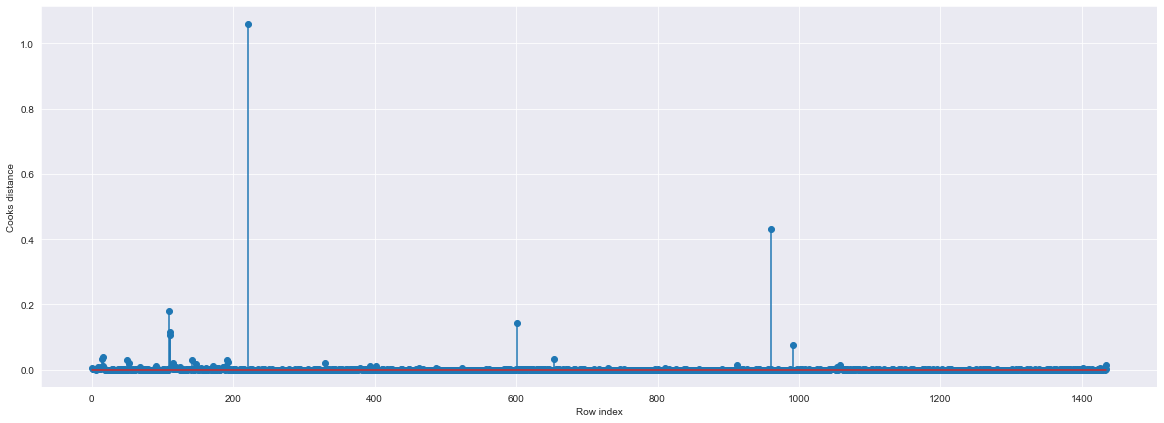

In [44]:
#plot influencer values by using steam plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_cleaned4)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')

In [45]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 1.0607870279725073)

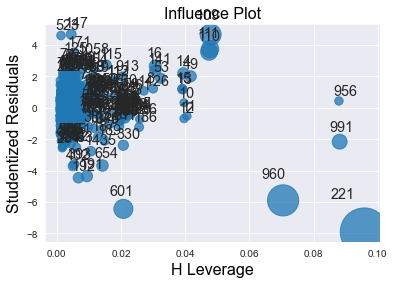

In [46]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [47]:
k=data_cleaned4.shape[1]
n=data=data_cleaned4.shape[0]
levarage_cutoff=3*((k+1)/n)

In [48]:
levarage_cutoff

0.014623955431754876

In [49]:
data_cleaned4[data_cleaned4.index.isin([221])]

,Price,Age,KM,HP,Gears,Weight
221,12450,44,74172,110,5,1615


In [50]:
data_cleaned5=data_cleaned4.drop(data_cleaned3.index[[221]],axis=0).reset_index()

In [51]:
data_cleaned.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,5,1170


In [52]:
model2=smf.ols('Price~Age+KM+HP+Gears+Weight',data=data_cleaned5).fit()

In [53]:
model2.params

Intercept   -9197.058953
Age          -119.168112
KM             -0.020697
HP             27.977451
Gears         623.133068
Weight         20.559389
dtype: float64

In [54]:
print(model2.tvalues,'\n',model2.pvalues)

Intercept    -7.017883
Age         -46.014798
KM          -17.447150
HP           10.992696
Gears         3.287233
Weight       24.973685
dtype: float64 
 Intercept     3.468438e-12
Age          2.436121e-284
KM            5.990367e-62
HP            4.847975e-27
Gears         1.036340e-03
Weight       1.579713e-114
dtype: float64


In [55]:
print(model2.rsquared,'\n',model2.rsquared_adj)

0.8685416764053224 
 0.8680817102625838


In [56]:
data_cleaned5.shape

(1435, 7)

In [66]:
#Model deletion diagnostics
#Detecting influencer/outliers
#Cooks distance
model2_influence=model2.get_influence()
(c1, _)=model2_influence.cooks_distance

In [67]:
c1

array([4.51544699e-03, 2.65120614e-03, 3.32404386e-03, ...,
       8.48092047e-06, 8.90349483e-04, 1.62711096e-02])

<ipython-input-68-5316f89f52b7>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data_cleaned5)),np.round(c1,3))


Text(0, 0.5, 'Cooks distance')

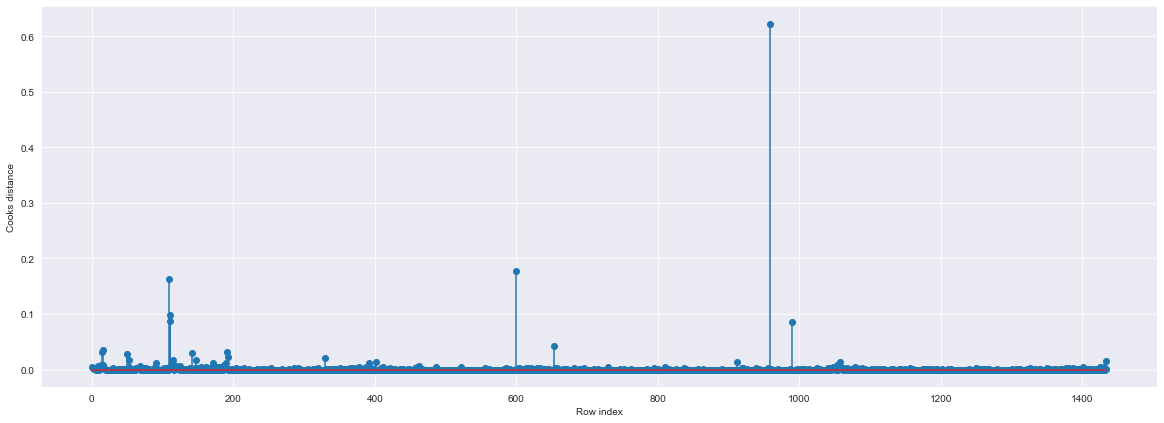

In [68]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_cleaned5)),np.round(c1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')

In [70]:
#index and value of influencer where c is more than .5
(np.argmax(c1),np.max(c1))

(959, 0.6232710757700008)

In [71]:
k=data_cleaned5.shape[1]
n=data_cleaned5.shape[0]
levarage_cutoff=3*((k+1)/n)

In [72]:
levarage_cutoff

0.016724738675958188

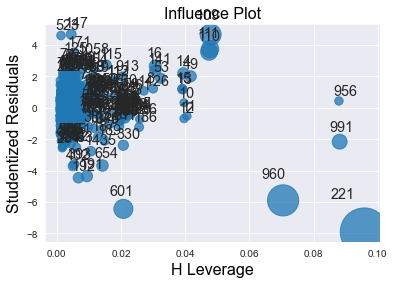

In [73]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()